# Esercitazione 11 - Regressione con reti neurali

## 1 Obiettivo

L'obiettivo di questa esercitazione è utilizzare delle reti neurali come strumento per eseguire una regressione. Verranno studiate le potenzialità i limiti di questo strumento e la dipendenza dei risultati dalla struttura della rete neurale.

## 2 Implementazione

Per l'implementazione del codice utilizzato nel corso di questa esercitazione verrà utilizzata la libreria Keras fornita con tensorflow. 

L'implementazione seguirà i seguenti step:
- generazione dei dati divisi in training set e validation set
- scelta degli iperparametri che definiscono la struttura della rete neurale
- preparazione del modello di rete neurale
- compilazione ed esecuzione del modello
- salvataggio dei risultati ottenuti

I dati da elaborare sono costituiti da coppie di valori $(x,y)$. L'obiettivo della rete neurale è quello di effettuare una regressione, ovvero determinare una funzione $f$ tale che $y=f(x)$. In questo caso la $f$ corrisponde all'azione dell'intera rete allenata sul valore di x, in altre parole deve essere possibile predire il valore di y dato quello della x corrispondente.

In questo caso, essendo una implementazione atta a studiare lo strumento, le coppie $(x,y)$ vengono generate partendo da una forma funzionale $y=f(x)$ nota. Viene inoltre aggiunto alla y un rumore gaussiano caratterizzato da una specifica deviazione standard `sigma`:
$$
    y = f(x) + N(0, \sigma)
$$

## 3 Codice

Import necessari

In [4]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

Impostazione degli iperparametri

In [5]:
para = {
    'n_hidden_layers' : 2,
    'n_neurons_per_layer' : 16,
    'activation_function' : 'relu',
    'opt' : 'adam',
    'loss_function' : 'mse',

    'sigma' : 0.1,
    'n_epochs' : 500,
    'n_train_data' : 500,
    'n_valid_data' : 50,

    'simulation_name' : 'es2test17'}

Generazione dei set di dati

In [3]:
def target_function_es1(x):
    return 2*x + 1

def target_function_es2(x):
    return 4 - 3*x -2*(x**2) + 3*(x**3)

np.random.seed(0)

x_train = np.random.uniform(-1, 1, para['n_train_data'])
x_valid = np.random.uniform(-1, 1, para['n_valid_data'])
x_valid.sort()

y_target =  target_function_es2(x_valid)
y_train = np.random.normal(target_function_es2(x_train), para['sigma'])
y_valid = np.random.normal(y_target, para['sigma'])

Mostro i dati che ho generato

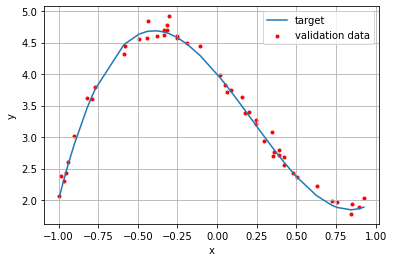

In [4]:
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data', marker='.')
plt.legend()
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Preparo il modello

In [5]:
model = tf.keras.Sequential()

#layer di input 
model.add(Dense(1, input_shape=(1,), activation=para['activation_function']))

#hidden layers
for i in range(0, para['n_hidden_layers']):
        model.add(Dense(para['n_neurons_per_layer'], activation=para['activation_function']))
        
#layer di output
model.add(Dense(1))

Mostro un sommario del modello che ho costruito. Viene anche indicato il numero di parametri della rete che verranno allenati.

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________


Compilo il modello e lo eseguo

In [7]:
model.compile(optimizer=para['opt'], loss=para['loss_function'], metrics=['mse'])
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=para['n_epochs'],
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/500
16/16 [==============================] - 1s 10ms/step - loss: 12.1652 - mse: 12.1652 - val_loss: 11.9622 - val_mse: 11.9622
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 11.7254 - mse: 11.7254 - val_loss: 11.4939 - val_mse: 11.4939
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 11.2002 - mse: 11.2002 - val_loss: 10.8984 - val_mse: 10.8984
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 10.5666 - mse: 10.5666 - val_loss: 10.2026 - val_mse: 10.2026
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 9.8519 - mse: 9.8519 - val_loss: 9.4502 - val_mse: 9.4502
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 9.1063 - mse: 9.1063 - val_loss: 8.6634 - val_mse: 8.6634
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 8.3479 - mse: 8.3479 - val_loss: 7.8811 - val_mse: 7.8811
Epoch 8/500
16/16 [==============================] - 0s 3ms/step -

16/16 [==============================] - 0s 4ms/step - loss: 0.2635 - mse: 0.2635 - val_loss: 0.4325 - val_mse: 0.4325
Epoch 64/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2636 - mse: 0.2636 - val_loss: 0.4314 - val_mse: 0.4314
Epoch 65/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2632 - mse: 0.2632 - val_loss: 0.4331 - val_mse: 0.4331
Epoch 66/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2634 - mse: 0.2634 - val_loss: 0.4324 - val_mse: 0.4324
Epoch 67/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2630 - mse: 0.2630 - val_loss: 0.4334 - val_mse: 0.4334
Epoch 68/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2634 - mse: 0.2634 - val_loss: 0.4317 - val_mse: 0.4317
Epoch 69/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2629 - mse: 0.2629 - val_loss: 0.4314 - val_mse: 0.4314
Epoch 70/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2627 - mse: 0

Epoch 125/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2575 - mse: 0.2575 - val_loss: 0.4247 - val_mse: 0.4247
Epoch 126/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2568 - mse: 0.2568 - val_loss: 0.4254 - val_mse: 0.4254
Epoch 127/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2565 - mse: 0.2565 - val_loss: 0.4250 - val_mse: 0.4250
Epoch 128/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2564 - mse: 0.2564 - val_loss: 0.4242 - val_mse: 0.4242
Epoch 129/500
16/16 [==============================] - 0s 4ms/step - loss: 0.2559 - mse: 0.2559 - val_loss: 0.4246 - val_mse: 0.4246
Epoch 130/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2556 - mse: 0.2556 - val_loss: 0.4243 - val_mse: 0.4243
Epoch 131/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2553 - mse: 0.2553 - val_loss: 0.4245 - val_mse: 0.4245
Epoch 132/500
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 9ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.1501 - val_mse: 0.1501
Epoch 187/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0890 - mse: 0.0890 - val_loss: 0.1444 - val_mse: 0.1444
Epoch 188/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0871 - mse: 0.0871 - val_loss: 0.1383 - val_mse: 0.1383
Epoch 189/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0846 - mse: 0.0846 - val_loss: 0.1353 - val_mse: 0.1353
Epoch 190/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0815 - mse: 0.0815 - val_loss: 0.1287 - val_mse: 0.1287
Epoch 191/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0795 - mse: 0.0795 - val_loss: 0.1240 - val_mse: 0.1240
Epoch 192/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0763 - mse: 0.0763 - val_loss: 0.1198 - val_mse: 0.1198
Epoch 193/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0747 -

Epoch 248/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0312 - mse: 0.0312 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 249/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0358 - val_mse: 0.0358
Epoch 250/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 251/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 252/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0411 - val_mse: 0.0411
Epoch 253/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 254/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0294 - mse: 0.0294 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 255/500
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 310/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 311/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 312/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 313/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 314/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 315/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0195 - mse: 0.0195 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 316/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0199 -

Epoch 371/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184 - val_loss: 0.0182 - val_mse: 0.0182
Epoch 372/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0174 - mse: 0.0174 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 373/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0159 - val_mse: 0.0159
Epoch 374/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0150 - val_mse: 0.0150
Epoch 375/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 376/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 377/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0160 - mse: 0.0160 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 378/500
16/16 [==============================] - 0s 3ms/step - 

16/16 [==============================] - 0s 3ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0155 - val_mse: 0.0155
Epoch 433/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 434/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0157 - mse: 0.0157 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 435/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0127 - val_mse: 0.0127
Epoch 436/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0125 - val_mse: 0.0125
Epoch 437/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0128 - val_mse: 0.0128
Epoch 438/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0150 - mse: 0.0150 - val_loss: 0.0134 - val_mse: 0.0134
Epoch 439/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0144 -

Epoch 494/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 495/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 496/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 497/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 498/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 499/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 500/500
16/16 [==============================] - 0s 6ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0139 - val_mse: 0.0139


Valuto il modello allenato applicandolo al validation set

In [8]:
# evaluate model
score_val_data = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_target_data = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
val_loss, val_accuracy = score_val_data
target_loss, target_accuracy = score_target_data

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - mse: 0.0034


In [9]:
print('Test loss on validation data:', val_loss)
print('Test loss on target data:', target_loss)

Test loss on validation data: 0.013904588297009468
Test loss on target data: 0.0034394189715385437


Mostro l'andamento della loss valutata sul test set e sul training set in funzione dell'epoca

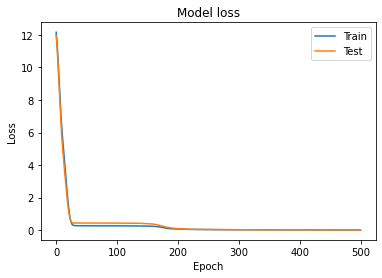

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Mostro le predizioni del modello sui dati target

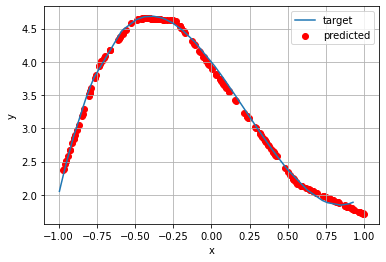

In [11]:
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Salvo i risultati su file

In [37]:
#create directory for saving output
ndir = f"../11/{para['simulation_name']}_outfiles"

try:
    os.mkdir(ndir)
except FileExistsError:
    pass

#saving parameters
with open(f"{ndir}/para.js", 'w') as para_f:
    json.dump(para, para_f)
    
#saving test set and validation set
data = {'x_train': x_train.tolist(), 'y_train': y_train.tolist(), 
       'x_valid': x_valid.tolist(), 'y_valid': y_valid.tolist()}
with open(f"{ndir}/data.js", 'w') as data_f:
    json.dump(data, data_f)

#saving history
with open(f"{ndir}/history.js", 'w') as history_f:
    json.dump(history.history, history_f)

#saving scores
scores = {'val_loss': val_loss, 'target_loss': target_loss}
with open(f"{ndir}/scores.js", 'w') as scores_f:
    json.dump(scores, scores_f)
    
#saving x_predicted and y_predicted
predicted = {'x_predicted': x_predicted.tolist(), 'y_predicted': y_predicted.tolist()}
with open(f"{ndir}/predicted.js", 'w') as pred_f:
    json.dump(predicted, pred_f)

## 4 Esercizio 1

In questo esercizio viene studiato l'utilizzo della rete per la regressione di alcuni dati estratti utilizzando come funzione target

$$
    f(x) = 2x +1
$$

Essendo una funzione lineare dovrebbe bastare un solo neurone, senza funzione di attivazione, per eseguire la regressione. 
Ho quindi utilizzato il codice precedente mantenendo fissati i seguenti parametri:
- 0 hidden layer
- nessuna funzione di attivazione
- ottimizzatore: 'adam'
- loss function: scarto quadratico medio, ovvero 

$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$


Ho variato, nel corso delle diverse simulazioni che ho eseguito
- la dimensione del training set
- la `sigma` che rappresenta la deviazione standard della distribuzione gaussiana con cui viene generato il rumore aggiunto ai dati. Valori maggiori corrispondono a dati più rumorosi.

Dallo storico della loss function valutata nel corso delle diverse epoche, ho anche valutato l'influenza del valore di questo parametro (numero di epoche) sui risultati che si possono ottenere.

### 4.1 Variazione del parametro sigma

Ho eseguito diverse simulazioni variando il parametro $\sigma$. In questo modo vengono generati dati di training e validazione caratterizzati da diversa rumorosità. Sotto sono presentati i risultati che ho ottenuto con alcuni valori specifici di $\sigma$. In tutti i casi il training set generato è costituito da 500 punti.

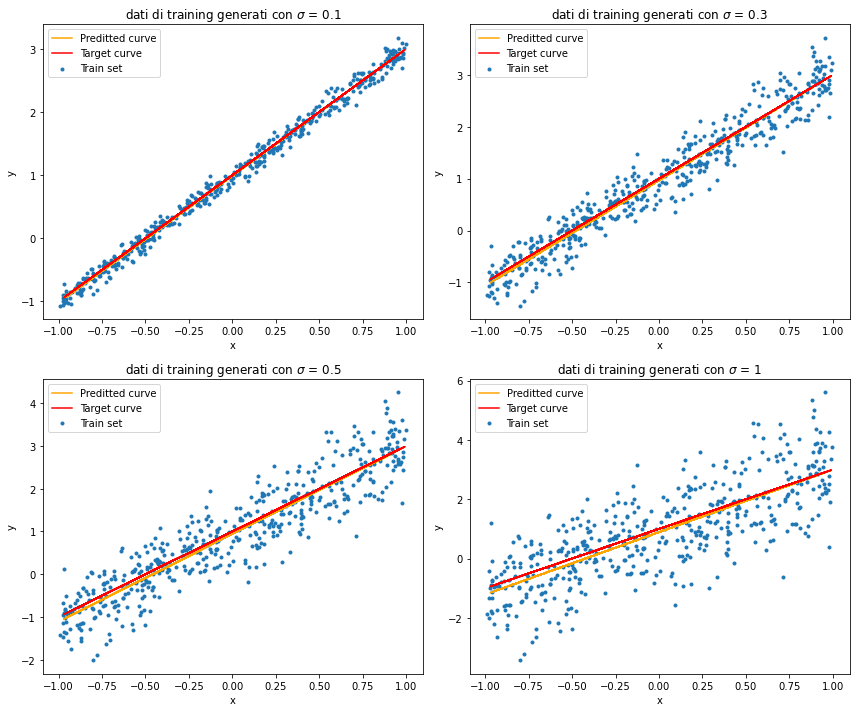

In [23]:
n_tests = 4
fig, axes = plt.subplots(2,2)
axes = axes.flatten()
fig.set_size_inches(12,10)

para = []
for i in range(0, n_tests):
        cdir = f"../11/es1test{i+1}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/para.js") as para_f:
            para.append(json.load(para_f))
        
        #getting training sets
        with open(f"{cdir}/data.js") as data_f:
            data = json.load(data_f)
        
        #getting predictedd values
        with open(f"{cdir}/predicted.js") as pred_f:
            pred = json.load(pred_f)
            
        axes[i].set_title(f"dati di training generati con $\sigma$ = {para[-1]['sigma']}")
    
        axes[i].scatter(data['x_train'], data['y_train'], marker='.')
        axes[i].plot(pred['x_predicted'], pred['y_predicted'], color='orange')
        x_target = target_function_es1(np.array((pred['x_predicted'])))
        axes[i].plot(pred['x_predicted'],x_target, color='red')
        axes[i].set_ylabel('y')
        axes[i].set_xlabel('x')
        axes[i].legend([ 'Preditted curve', 'Target curve', 'Train set'], loc='best')
        
plt.tight_layout()
plt.show()

In questi primi grafici, ciascuno relativo alla regressione di dati differenti, è possibile osservare i punti del training set corrispondente, la curva della funzione target e la curva ottenuta dall'allenamento del modello. Come aspettato l'accuratezza del modello, rispetto alla funzione target, diminuisce all'aumentare della rumorosità dei dati. Tuttavia anche nel caso dell'ultimo set molto rumoroso il modello ottenuto sembra riprodurre abbastanza bene la funzione target.

Queste affermazioni qualitative sono supportate quantitativamente valutando il modello con la funzione di costo. Ho valutato lo scarto quadratico medio dei punti predetti dal modello sia per il validation set, costituito da punti a cui è stato applicato il rumore, sia su un nuovo set di punti privo di rumore.

In [24]:
print('Calcolo dello scarto quadratico medio\n')
for i in range(0, n_tests):
        cdir = f"../11/es1test{i+1}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/scores.js") as scores_f:
            scores = json.load(scores_f)
        
        print(f"Regressione dei dati generati con σ = {para[i]['sigma']:.1f}\n")
        print(f"\t mse calcolato sul validation set\t\t\t: {scores['val_loss']:.4f}")
        print(f"\t mse calcolato su un set di punti target senza rumore\t: {scores['target_loss']:.4f}\n")

Calcolo dello scarto quadratico medio

Regressione dei dati generati con σ = 0.1

	 mse calcolato sul validation set			: 0.0106
	 mse calcolato su un set di punti target senza rumore	: 0.0002

Regressione dei dati generati con σ = 0.3

	 mse calcolato sul validation set			: 0.1001
	 mse calcolato su un set di punti target senza rumore	: 0.0014

Regressione dei dati generati con σ = 0.5

	 mse calcolato sul validation set			: 0.2807
	 mse calcolato su un set di punti target senza rumore	: 0.0045

Regressione dei dati generati con σ = 1.0

	 mse calcolato sul validation set			: 1.1160
	 mse calcolato su un set di punti target senza rumore	: 0.0163



Come si può vedere l'mse aumenta in entrambi i casi all'aumentare del rumore dei dati. Tuttavia mentre il valore calcolato sui dati rumorosi cresce significativamente divenendo maggiore della stessa $\sigma$, l'errore rispetto alla funzione target rimane contenuto.

È poi interessante studiare l'evoluzione del valore della loss function durante l'evoluzione. Queste informazioni sono contenute nei grafici successivi.

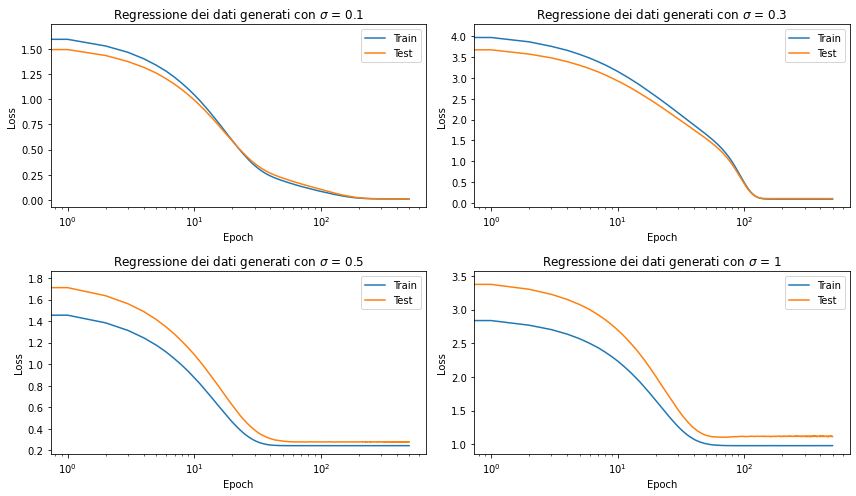

In [25]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()
fig.set_size_inches(12,7)

for i in range(0, n_tests):
        cdir = f"../11/es1test{i+1}_outfiles"
        
        #getting history of loss
        with open(f"{cdir}/history.js") as history_f:
            hist = json.load(history_f)
            
        axes[i].set_title(f"Regressione dei dati generati con $\sigma$ = {para[i]['sigma']}")
        
        axes[i].plot(hist['loss'])
        axes[i].plot(hist['val_loss'])
        axes[i].set_ylabel('Loss')
        axes[i].set_xlabel('Epoch')
        axes[i].set_xscale('log')
        axes[i].legend(['Train', 'Test'], loc='best')

plt.tight_layout()
plt.show()

Come si può vedere nei grafici è rappresentato il valore della loss in funzione dell'epoca, valutata sia sul training set che sul set di validazione. Come prima osservazione si noti che in tutti i casi viene raggiunto il valore minimo dopo qualche centinaio circa di epoche. La simulazione di 500 o 300 epoche è quindi sufficiente.

Noto, diversamente da come mi sarei aspettato, che le curve relative al training set meno rumoroso raggiungono il minimo in un numero superiore di epoche rispetto a quelle degli altri set di dati. Tuttavia, una volta raggiunto il minimo questo è inferiore rispetto al valore ottenuto negli altri casi. Inoltre, i dati più rumorosi determinano delle differenze tra i valori della loss function valutata sul training set e quelli della stessa funzione valutata sul set di validazione. 

### 4.2 Variazione della dimensione del training set

La dimensione del training set è uno dei parametri più importanti in tutte le applicazioni di tecniche di machine learning.

Ho studiato come questo parametro influenza la capacità predittiva del modello eseguendo 3 regressioni a partire da 3 training set di diverse dimensioni. Ho eseguito poi analoghe regressioni mantenendo tutti i parametri invariati ma aumentando la rumorosità (e quindi $\sigma$) dei dati.

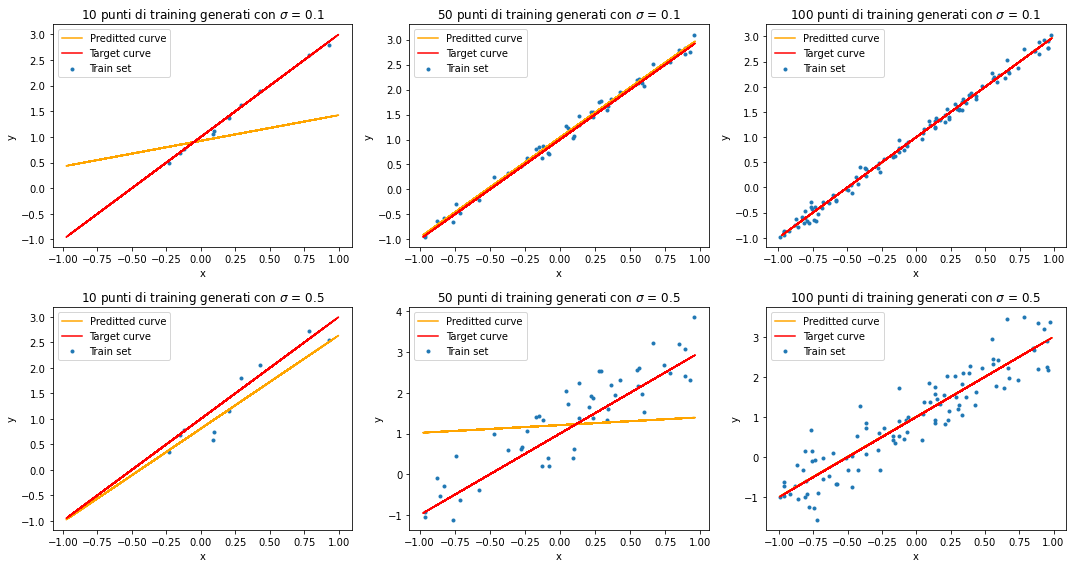

Calcolo dello scarto quadratico medio

Regressione dei 10 dati generati con σ = 0.1

	 mse calcolato sul validation set			: 0.8101
	 mse calcolato su un set di punti target senza rumore	: 0.73

Regressione dei 50 dati generati con σ = 0.1

	 mse calcolato sul validation set			: 0.0105
	 mse calcolato su un set di punti target senza rumore	: 0.0016

Regressione dei 100 dati generati con σ = 0.1

	 mse calcolato sul validation set			: 0.0076
	 mse calcolato su un set di punti target senza rumore	: 1.4e-06

Regressione dei 10 dati generati con σ = 0.5

	 mse calcolato sul validation set			: 0.3684
	 mse calcolato su un set di punti target senza rumore	: 0.046

Regressione dei 50 dati generati con σ = 0.5

	 mse calcolato sul validation set			: 1.5611
	 mse calcolato su un set di punti target senza rumore	: 1.4

Regressione dei 100 dati generati con σ = 0.5

	 mse calcolato sul validation set			: 0.1929
	 mse calcolato su un set di punti target senza rumore	: 2.6e-05



In [26]:
n_tests = 6
fig, axes = plt.subplots(2,3)
axes = axes.flatten()
fig.set_size_inches(15,8)

para = []
for i in range(0, n_tests):
        cdir = f"../11/es1test{i+5}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/para.js") as para_f:
            para.append(json.load(para_f))
        
        #getting training sets
        with open(f"{cdir}/data.js") as data_f:
            data = json.load(data_f)
        
        #getting predictedd values
        with open(f"{cdir}/predicted.js") as pred_f:
            pred = json.load(pred_f)
            
        axes[i].set_title(f"{para[-1]['n_train_data']} punti di training generati con $\sigma$ = {para[-1]['sigma']}")
    
        axes[i].scatter(data['x_train'], data['y_train'], marker='.')
        axes[i].plot(pred['x_predicted'], pred['y_predicted'], color='orange')
        x_target = target_function_es1(np.array((pred['x_predicted'])))
        axes[i].plot(pred['x_predicted'],x_target, color='red')
        axes[i].set_ylabel('y')
        axes[i].set_xlabel('x')
        axes[i].legend([ 'Preditted curve', 'Target curve', 'Train set'], loc='best')

plt.tight_layout()
plt.show()

print('Calcolo dello scarto quadratico medio\n')
for i in range(0, n_tests):
        cdir = f"../11/es1test{i+5}_outfiles"
        
        #getting parameters
        with open(f"../11/{cdir}/scores.js") as scores_f:
            scores = json.load(scores_f)
        
        print(f"Regressione dei {para[i]['n_train_data']} dati generati con σ = {para[i]['sigma']:.1f}\n")
        print(f"\t mse calcolato sul validation set\t\t\t: {scores['val_loss']:.4f}")
        print(f"\t mse calcolato su un set di punti target senza rumore\t: {scores['target_loss']:.2}\n")

In questi grafici si può innanzitutto osservare come la rumorosità dei dati sia strettamente correlata alla dimensione del set di training necessaria ad ottenere modelli sufficientemente accurati. Si nota infatti che nel caso di dati poco rumorosi sono sufficienti 50 punti per avere dei buoni risultati mentre aumentando il rumore tale numero non è più sufficiente. 
Ovviamente in entrambi i casi l'accuratezza del modello migliora al crescere della dimensione del set di allenamento.

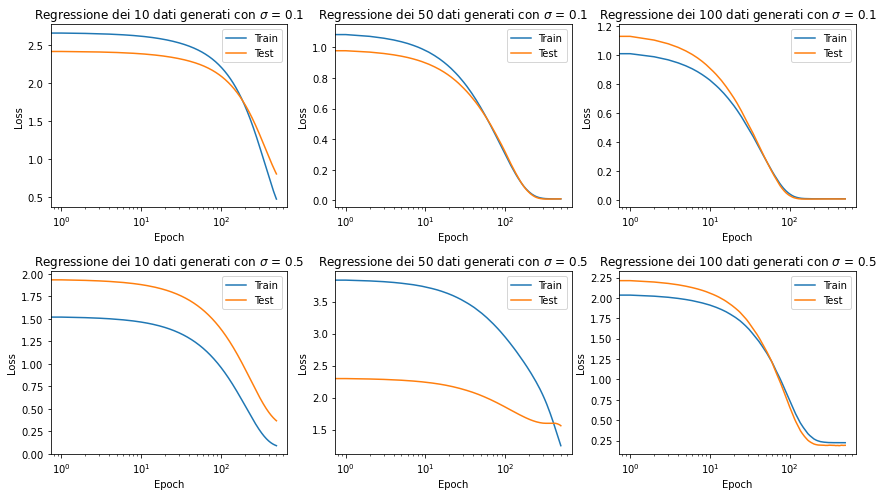

In [27]:
fig, axes = plt.subplots(2,3)
axes = axes.flatten()
fig.set_size_inches(12,7)

for i in range(0, n_tests):
        cdir = f"../11/es1test{i+5}_outfiles"
        
        #getting history of loss
        with open(f"{cdir}/history.js") as history_f:
            hist = json.load(history_f)
            
        axes[i].set_title(f"Regressione dei {para[i]['n_train_data']} dati generati con $\sigma$ = {para[i]['sigma']}")
        
        axes[i].plot(hist['loss'])
        axes[i].plot(hist['val_loss'])
        axes[i].set_ylabel('Loss')
        axes[i].set_xlabel('Epoch')
        axes[i].set_xscale('log')
        axes[i].legend(['Train', 'Test'], loc='best')

plt.tight_layout()
plt.show()

Anche questi grafici rispecchiano gli stessi concetti. In aggiunta si può osservare che nelle due regressioni effettuate con training set costituiti da 10 punti entrambe le curve decrescono fino all'ultima epoca. Questo indica la possibilità di ottenere risultati migliori aumentandone il numero.
La stessa osservazione non può essere fatta nelle regressioni effettuate con 50 punti poichè in questo caso, sebbene la loss function valutata sul training set continui a diminuire, la loss valutata sul test set raggiunge un valore di saturazione.


## 5 Esercizio 2

In questo secondo esercizio viene utilizzato sempre lo stesso codice dell'esercizio precedente sostituendo però la nuova funzione target

$$
f(x)=4-3x-2x^2+3x^3
$$

Anche in questo caso l'obiettivo è la regressione di alcuni punti generati da questa funzione con l'aggiunta di rumore gaussiano. Le $x$ contenute nei training e test set saranno comprese tra -1 e 1.

In questo esercizio viene studiato l'effetto della variazione dei seguenti iperparametri:
- numero di layer
- numero di neuroni in ciascun layer
- funzione di attivazione
- ottimizzatore
- loss function

Quando non diversamente specificato, gli altri parametri assumono i seguenti valori:
- sigma pari 0.1
- 500 punti nel training set
- 50 punti nel set di validazione
- 500 epoche

### 5.1 Variazione del numero di layer nascosti e della loro dimensione

Come primo esperimento ho variato la struttura della rete modificando il numero di layer nascosti e la loro dimensione.
Subito sotto sono presenti i risultati ottenuti con alcune di queste strutture. Per esse ho mantenuto invariati l'ottimizzatore (adam), la funzione di attivazione (relu) e la funzione di costo (mse). Anche gli altri parametri sono quelli standard già elencati ad eccezione del parametro sigma che è stato variato tra la prima e seconda coppia di simulazioni.

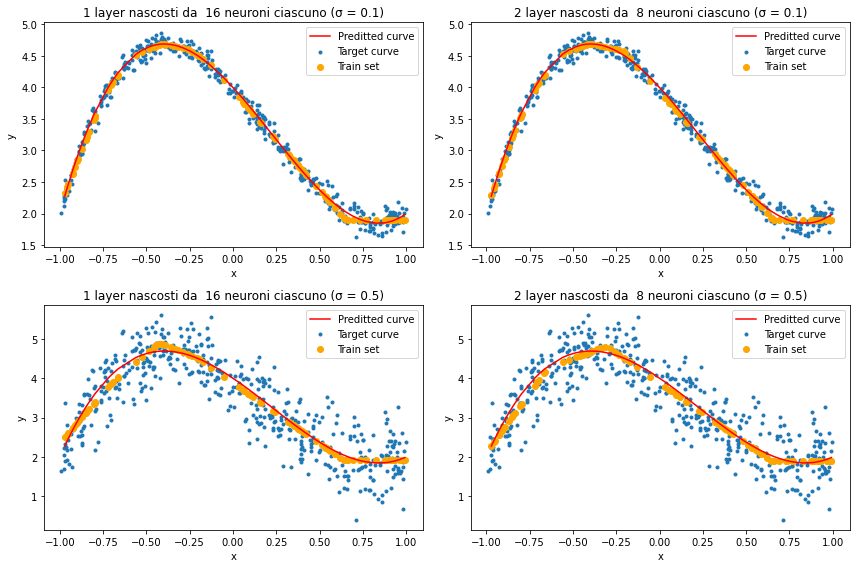

Calcolo dello scarto quadratico medio

Regressione dei 500 dati generati con σ = 0.1

	 mse calcolato sul validation set			: 0.0124
	 mse calcolato su un set di punti target senza rumore	: 0.0016

Regressione dei 500 dati generati con σ = 0.1

	 mse calcolato sul validation set			: 0.0122
	 mse calcolato su un set di punti target senza rumore	: 0.0013

Regressione dei 500 dati generati con σ = 0.5

	 mse calcolato sul validation set			: 0.2630
	 mse calcolato su un set di punti target senza rumore	: 0.013

Regressione dei 500 dati generati con σ = 0.5

	 mse calcolato sul validation set			: 0.2676
	 mse calcolato su un set di punti target senza rumore	: 0.011



In [30]:
n_tests = 4
fig, axes = plt.subplots(2,2)
axes = axes.flatten()
fig.set_size_inches(12,8)

para = []
for i in range(0, n_tests):
        cdir = f"../11/es2test{i+1}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/para.js") as para_f:
            para.append(json.load(para_f))
        
        #getting training sets
        with open(f"{cdir}/data.js") as data_f:
            data = json.load(data_f)
        
        #getting predictedd values
        with open(f"{cdir}/predicted.js") as pred_f:
            pred = json.load(pred_f)
            
        axes[i].set_title(f"{para[-1]['n_hidden_layers']} layer nascosti da " + 
                          f" {para[-1]['n_neurons_per_layer']} neuroni ciascuno (σ = {para[-1]['sigma']})")
    
        axes[i].scatter(data['x_train'], data['y_train'], marker='.')
        axes[i].scatter(pred['x_predicted'], pred['y_predicted'], color='orange')
        x_target = target_function_es2(np.sort((pred['x_predicted'])))
        axes[i].plot(np.sort(pred['x_predicted']),x_target, color='red')
        axes[i].set_ylabel('y')
        axes[i].set_xlabel('x')
        axes[i].legend([ 'Preditted curve', 'Target curve', 'Train set'], loc='best')

plt.tight_layout()
plt.show()

print('Calcolo dello scarto quadratico medio\n')
for i in range(0, n_tests):
        cdir = f"../11/es2test{i+1}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/scores.js") as scores_f:
            scores = json.load(scores_f)
        
        print(f"Regressione dei {para[i]['n_train_data']} dati generati con σ = {para[i]['sigma']:.1f}\n")
        print(f"\t mse calcolato sul validation set\t\t\t: {scores['val_loss']:.4f}")
        print(f"\t mse calcolato su un set di punti target senza rumore\t: {scores['target_loss']:.2}\n")

In entrambi i modelli di rete neurale utilizzati sono presenti 16 neuroni negli strati nascosti. La diversa disposizione fa però si che la rete costituita da un solo layer nascosto disponga di 51 parametri allenabili mentre quella costituita da due layer ne ha 99. Mi aspetterei quindi che quest'ultima performi meglio. Le aspettative vengono soddisfatte solo nella regressione dei dati meno rumorosi. Tuttavia la differenza tra i valori delle loss function è minima, ciò mi porterebbe a concludere che non vi sia una reale differenza tra i due modelli. La funzione che si sta cercando di riprodurre è un polinomio di terzo grado che è quindi completamente definito da 4 parametri. Queste reti potrebbero essere sovradimensionate per il problema che si sta affrontando.

Gli andamenti delle funzioni di loss, presenti qui sotto, non offrono particolari informazioni aggiuntive. Permettono solamente di concludere che tutta la potenzialità delle varie reti è stata sfruttata appieno in quanto nelle ultime epoche i valori appaiono saturati su minimi costanti. Non mi aspetto che aumentando il numero delle epoche si ottengano risultati significativamente migliori.

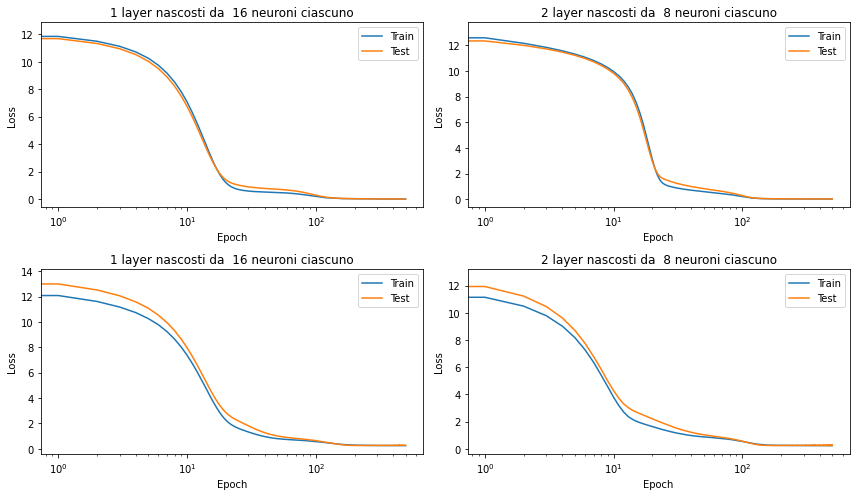

In [31]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()
fig.set_size_inches(12,7)

for i in range(0, n_tests):
        cdir = f"../11/es2test{i+1}_outfiles"
        
        #getting history of loss
        with open(f"{cdir}/history.js") as history_f:
            hist = json.load(history_f)
            
        axes[i].set_title(f"{para[i]['n_hidden_layers']} layer nascosti da " + 
                          f" {para[i]['n_neurons_per_layer']} neuroni ciascuno")
        
        axes[i].plot(hist['loss'])
        axes[i].plot(hist['val_loss'])
        axes[i].set_ylabel('Loss')
        axes[i].set_xlabel('Epoch')
        axes[i].set_xscale('log')
        axes[i].legend(['Train', 'Test'], loc='best')

plt.tight_layout()
plt.show()

### 5.2 Variazione della funzione di attivazione

La funzione di attivazione è una funzione $\mathbb{R} \rightarrow \mathbb R$ contenuta all'interno del singolo neurone che ne restituisce l'output in funzione della somma pesata dei valori di input provenienti dalle varie connessioni in ingresso.

Esistono diversi tipi di funzione di attivazione. Ne ho sperimentate 3:

- la relu (rectified linear unit): f(x) = max(x, 0)
- la sigmoide: f(x) = 1 / (1 + exp(-x))
- l'esponenziale: f(x) = exp(x)

La sigmoide è sostanzialmente diversa dalle altre due in quanto limitata anche superiormente.

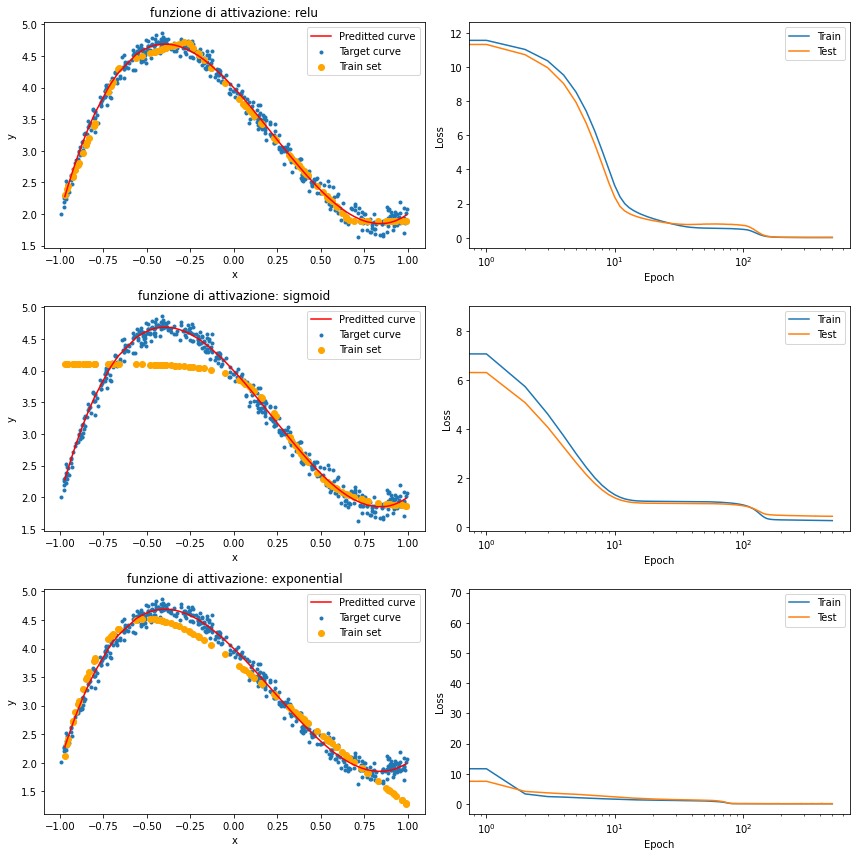

Calcolo dello scarto quadratico medio

funzione di attivazione: exponential
	 mse calcolato sul validation set			: 0.0157
	 mse calcolato su un set di punti target senza rumore	: 0.0047

funzione di attivazione: exponential
	 mse calcolato sul validation set			: 0.4429
	 mse calcolato su un set di punti target senza rumore	: 0.45

funzione di attivazione: exponential
	 mse calcolato sul validation set			: 0.0552
	 mse calcolato su un set di punti target senza rumore	: 0.036



In [33]:
n_tests = 3
fig, axes = plt.subplots(3,2)
#axes = axes.flatten()
fig.set_size_inches(12,12)

para = []
for i in range(0, n_tests):
        cdir = f"../11/es2test{i+8}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/para.js") as para_f:
            para.append(json.load(para_f))
        
        #getting training sets
        with open(f"{cdir}/data.js") as data_f:
            data = json.load(data_f)
        
        #getting predictedd values
        with open(f"{cdir}/predicted.js") as pred_f:
            pred = json.load(pred_f)
            
        #getting history of loss
        with open(f"{cdir}/history.js") as history_f:
            hist = json.load(history_f)
            
        axes[i][0].set_title(f"funzione di attivazione: {para[-1]['activation_function']}")
    
        axes[i][0].scatter(data['x_train'], data['y_train'], marker='.')
        axes[i][0].scatter(pred['x_predicted'], pred['y_predicted'], color='orange')
        x_target = target_function_es2(np.sort((pred['x_predicted'])))
        axes[i][0].plot(np.sort(pred['x_predicted']),x_target, color='red')
        axes[i][0].set_ylabel('y')
        axes[i][0].set_xlabel('x')
        axes[i][0].legend([ 'Preditted curve', 'Target curve', 'Train set'], loc='best')
    
        axes[i][1].plot(hist['loss'])
        axes[i][1].plot(hist['val_loss'])
        axes[i][1].set_ylabel('Loss')
        axes[i][1].set_xlabel('Epoch')
        axes[i][1].set_xscale('log')
        axes[i][1].legend(['Train', 'Test'], loc='best')
        
plt.tight_layout()
plt.show()

print('Calcolo dello scarto quadratico medio\n')
for i in range(0, n_tests):
        cdir = f"es2test{i+8}_outfiles"
        
        #getting parameters
        with open(f"../11/{cdir}/scores.js") as scores_f:
            scores = json.load(scores_f)
        
        print(f"funzione di attivazione: {para[-1]['activation_function']}")
        print(f"\t mse calcolato sul validation set\t\t\t: {scores['val_loss']:.4f}")
        print(f"\t mse calcolato su un set di punti target senza rumore\t: {scores['target_loss']:.2}\n")

Si può osservare la diversità dei risultati ottenuti variando la funzione di attivazione. Tra le tre quella che appare più performante è la 'relu'. Utilizzando le altre funzioni di attivazione si può notare come il risultato della regressione sia abbastanza diverso dalla funzione target. La scelta della funzione di attivazione è quindi da valutare con attenzione nell'implementazione di un modello.

### 5.3 Optimizers

L'ottimizzatore è l'algoritmo che viene utilizzato per ricercare la configurazione di parametri che minimizza la loss function. Ne esistono diversi. Un punto di partenza comune a molti è il concetto di discesa del gradiente. Se si suppone che il vettore $\vec w$ rappresenti i parametri della rete neurale, la funzione di costo può essere pensata come una funzione di questi parametri $L(\vec w)$ e l'allenamento della rete neurale corrisponde alla ricerca del suo minimo. L'algoritmo si basa sul fatto che in un punto $\vec w$ la direzione di massima discesa della funzione $L(\vec w)$ è quella individuata dalla direzione dell'opposto del gradiente. Ciascuno step corrisponde quindi al passaggio dal set di parametri $\vec w_i$ al set di parametri $\vec w_{i+1}$ secondo:

$$
\vec w_{i+1} = \vec w_i - \eta \vec \nabla { L(\vec w_i)}
$$

dove $\eta$ è un nuovo iperparametro detto "learning rate" che gestisce la velocità dell'algoritmo permettendo di controllare alcuni effetti indesiderati.
La funzione di costo, in questo caso lo scarto quadratico medio, viene normalmente calcolata su tutto il set di allenamento. Tuttavia, questa operazione può risultare particolarmente costosa computazionalmente. Per questa ragione una alternativa più comunemente utilizzata è la discesa stocastica del gradiente in cui la funzione di loss viene valutata solamente su un ristretto sottoinsieme del training set, scelto casualmente ad ogni iterazione. Questo ottimizzatore è chiamato in keras `sgd`.

Gli altri ottimizzatori che ho sperimentato sono `Adam` e `Adagrad`.

`Adagrad` è un ottimizzatore basato sempre sull'algoritmo della discesa del gradiente caratterizzato da learning rate diversi per ciascuna dimensione. Inoltre, tali valori vengono adattati durante l'allenamento in modo che i parametri che vengono aggiornati più frequentemente abbiano un learning rate minore.

`Adam` è basato sull'algoritmo della discesa stocastica del gradiente con l'aggiunta dei momenti al primo e secondo ordine. I momenti sono termini aggiuntivi proporzionali alla velocità con cui variano i parametri e che introducono una sorta di inerzia alla loro variazione. Questo metodo si basa sulla stima adattiva di questi momenti. Dalla documentazione:
> According to Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".

Nei grafici successivi sono presentati i risultati ottenuti con questi 3 ottimizzatori. In tutti i casi vengono utilizzate reti neurali costituite da due layer nascosti da 16 neuroni ciascuno. Come funzione di attivazione viene utilizzata la `relu` e come funzione di costo sempre lo scarto quadratico medio.

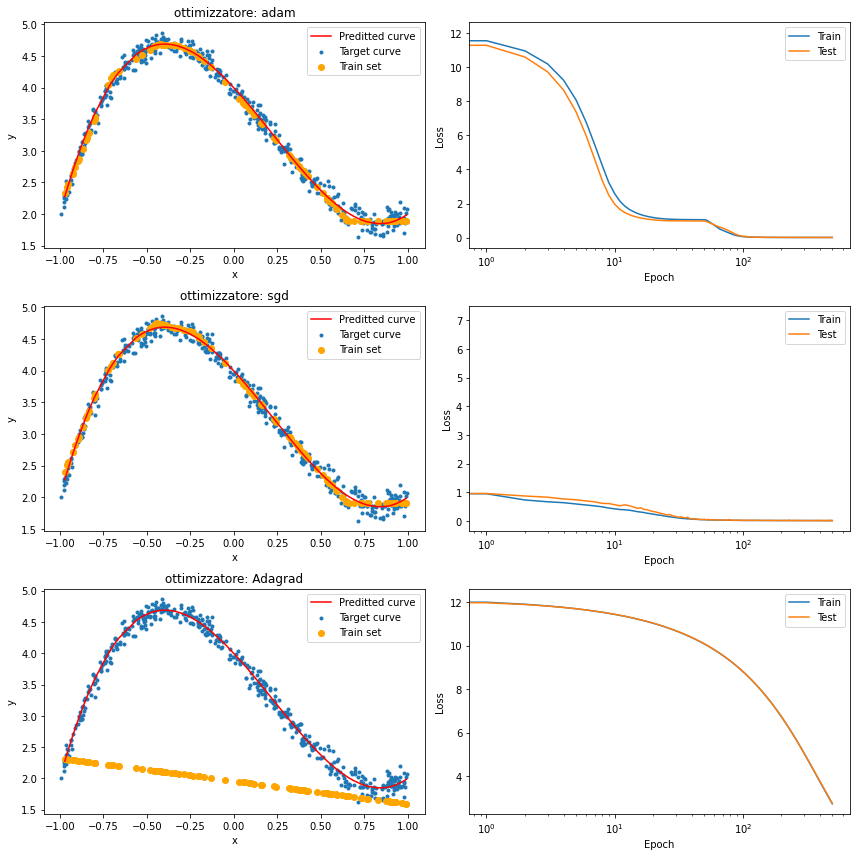

Calcolo dello scarto quadratico medio

ottimizztore: adam
	 mse calcolato sul validation set			: 0.0131
	 mse calcolato su un set di punti target senza rumore	: 0.0021

ottimizztore: sgd
	 mse calcolato sul validation set			: 0.0113
	 mse calcolato su un set di punti target senza rumore	: 0.0027

ottimizztore: Adagrad
	 mse calcolato sul validation set			: 2.7505
	 mse calcolato su un set di punti target senza rumore	: 2.7



In [35]:
n_tests = 3
fig, axes = plt.subplots(3,2)
#axes = axes.flatten()
fig.set_size_inches(12,12)

para = []
for i in range(0, n_tests):
        cdir = f"../11/es2test{i+11}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/para.js") as para_f:
            para.append(json.load(para_f))
        
        #getting training sets
        with open(f"{cdir}/data.js") as data_f:
            data = json.load(data_f)
        
        #getting predictedd values
        with open(f"{cdir}/predicted.js") as pred_f:
            pred = json.load(pred_f)
            
        #getting history of loss
        with open(f"{cdir}/history.js") as history_f:
            hist = json.load(history_f)
            
        axes[i][0].set_title(f"ottimizzatore: {para[-1]['opt']}")
    
        axes[i][0].scatter(data['x_train'], data['y_train'], marker='.')
        axes[i][0].scatter(pred['x_predicted'], pred['y_predicted'], color='orange')
        x_target = target_function_es2(np.sort((pred['x_predicted'])))
        axes[i][0].plot(np.sort(pred['x_predicted']),x_target, color='red')
        axes[i][0].set_ylabel('y')
        axes[i][0].set_xlabel('x')
        axes[i][0].legend([ 'Preditted curve', 'Target curve', 'Train set'], loc='best')
    
        axes[i][1].plot(hist['loss'])
        axes[i][1].plot(hist['val_loss'])
        axes[i][1].set_ylabel('Loss')
        axes[i][1].set_xlabel('Epoch')
        axes[i][1].set_xscale('log')
        axes[i][1].legend(['Train', 'Test'], loc='best')
        
plt.tight_layout()
plt.show()

print('Calcolo dello scarto quadratico medio\n')
for i in range(0, n_tests):
        cdir = f"es2test{i+11}_outfiles"
        
        #getting parameters
        with open(f"../11/{cdir}/scores.js") as scores_f:
            scores = json.load(scores_f)
        
        print(f"ottimizztore: {para[i]['opt']}")
        print(f"\t mse calcolato sul validation set\t\t\t: {scores['val_loss']:.4f}")
        print(f"\t mse calcolato su un set di punti target senza rumore\t: {scores['target_loss']:.2}\n")

Si può osservare come entrambi gli ottimizzatori `sgd` e `adam` abbiano dato dei buoni risultati permettendo di  raggiungere il minimo entro qualche centinaio di epoche.

L'ottimizzatore `Adagrad` sembra invece fallire. La loss function valutata sui set  di allenamento e validazione decresce fino all'ultima epoca, questo potrebbe indicare che aumentando il numero di epoche potrebbe essere possibile ottenere un buon risultato anche con questo ottimizzatore.

Anche questo parametro deve quindi essere valutato con attenzione quando si implementa un modello di rete neurale.

### 5.4 Loss

Un altro parametro che può essere esplorato è la funzione di costo. Ho eseguito alcune regressioni utilizzando i seguenti parametri fissi:
- 2 layer nascosti
- 16 neuroni per ogni layer nascosto
- ottimizzatore: `adam`
- funzione di attivazione: `relu`

Ho sperimentato diverse funzioni di costo, tra queste riporto i risultati ottenuti con le seguenti:

- __mean_squared_error__ $= \frac{1}{N} \sum_{i=1}^N \left| y_i^{out}-y_i^{lab}\right|^2$

- __mean_absolute_error__ $= \frac{1}{N} \sum_{i=1}^N \left| y_i^{out}-y_i^{lab}\right|$

    Differisce dalla precedente per il quadrato. Questo rende il MSE più sensibile, rispetto al MAE, agli errori più grandi che quindi verranno penalizzati maggiormente.

- __mean_squared_logarithmic_error__ $=\frac{1}{N}\sum_{i=1}^N \left|\log\frac{y_i^{out}+1}{y_i^{lab}+1}\right|^2$

    Questa funzione di costo viene solitamente utilizzata quando non si vogliono penalizzare eccessivamente grandi errori, presenti soprattutto se la funzione da predire assume valori grandi.

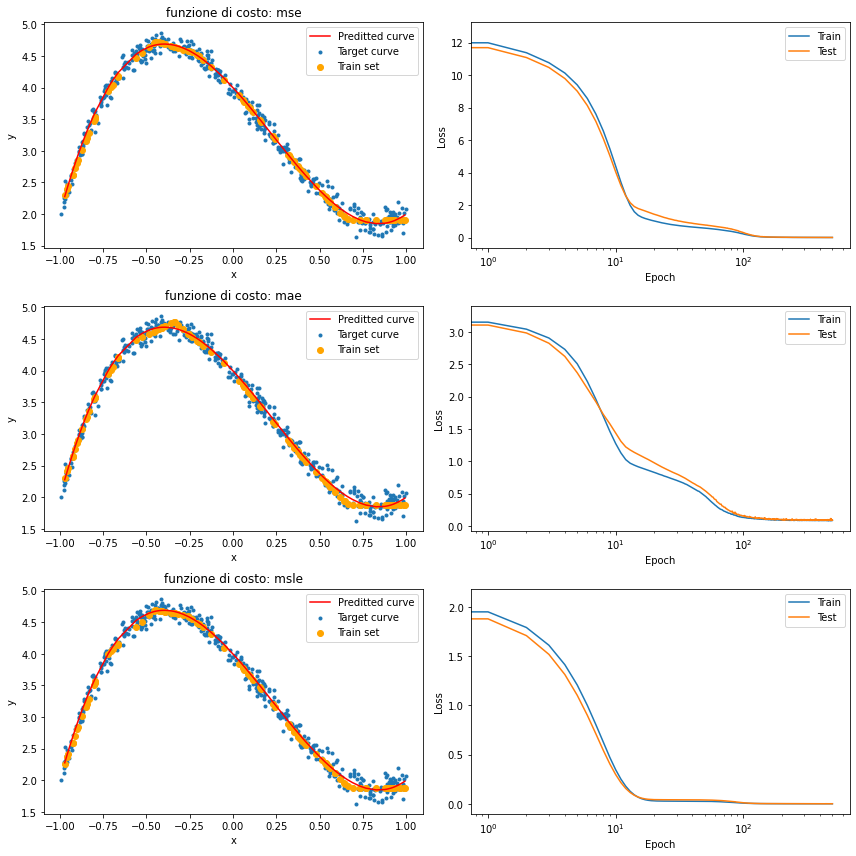

Calcolo dello scarto quadratico medio

funzione di costo: mse
	 mse calcolato sul validation set			: 0.0127
	 mse calcolato su un set di punti target senza rumore	: 0.0014

funzione di costo: mae
	 mse calcolato sul validation set			: 0.0901
	 mse calcolato su un set di punti target senza rumore	: 0.04

funzione di costo: msle
	 mse calcolato sul validation set			: 0.0009
	 mse calcolato su un set di punti target senza rumore	: 0.00013



In [36]:
n_tests = 3
fig, axes = plt.subplots(3,2)
#axes = axes.flatten()
fig.set_size_inches(12,12)

para = []
for i in range(0, n_tests):
        cdir = f"../11/es2test{i+14}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/para.js") as para_f:
            para.append(json.load(para_f))
        
        #getting training sets
        with open(f"{cdir}/data.js") as data_f:
            data = json.load(data_f)
        
        #getting predictedd values
        with open(f"{cdir}/predicted.js") as pred_f:
            pred = json.load(pred_f)
            
        #getting history of loss
        with open(f"{cdir}/history.js") as history_f:
            hist = json.load(history_f)
            
        axes[i][0].set_title(f"funzione di costo: {para[-1]['loss_function']}")
    
        axes[i][0].scatter(data['x_train'], data['y_train'], marker='.')
        axes[i][0].scatter(pred['x_predicted'], pred['y_predicted'], color='orange')
        x_target = target_function_es2(np.sort((pred['x_predicted'])))
        axes[i][0].plot(np.sort(pred['x_predicted']),x_target, color='red')
        axes[i][0].set_ylabel('y')
        axes[i][0].set_xlabel('x')
        axes[i][0].legend([ 'Preditted curve', 'Target curve', 'Train set'], loc='best')
    
        axes[i][1].plot(hist['loss'])
        axes[i][1].plot(hist['val_loss'])
        axes[i][1].set_ylabel('Loss')
        axes[i][1].set_xlabel('Epoch')
        axes[i][1].set_xscale('log')
        axes[i][1].legend(['Train', 'Test'], loc='best')
        
plt.tight_layout()
plt.show()

print('Calcolo dello scarto quadratico medio\n')
for i in range(0, n_tests):
        cdir = f"../11/es2test{i+14}_outfiles"
        
        #getting parameters
        with open(f"{cdir}/scores.js") as scores_f:
            scores = json.load(scores_f)
        
        print(f"funzione di costo: {para[i]['loss_function']}")
        print(f"\t mse calcolato sul validation set\t\t\t: {scores['val_loss']:.4f}")
        print(f"\t mse calcolato su un set di punti target senza rumore\t: {scores['target_loss']:.2}\n")

Come si può osservare tutte le diverse funzioni di costo permettono una buona regressione dei dati. Le differenze si notano principalmente nell'evoluzione del valore della funzione di costo nel corso delle varie epoche. Tra le 3 quella che risulta più performante è la `msle`.

La scelta della funzione di costo risulta anche legata agli altri parametri. Ho eseguito numerosi altri test in cui ho verificato alcune di queste complicate relazioni. Ad esempio si può osservare una certa dipendenza con la scelta della funzione di attivazione.

### 5.5 Predizioni fuori dal range dei dati
Infine un'osservazione che vale la pena compiere è relativa alla capacità predittiva del modello fuori dall'intervallo di valori in cui è stato allenato.

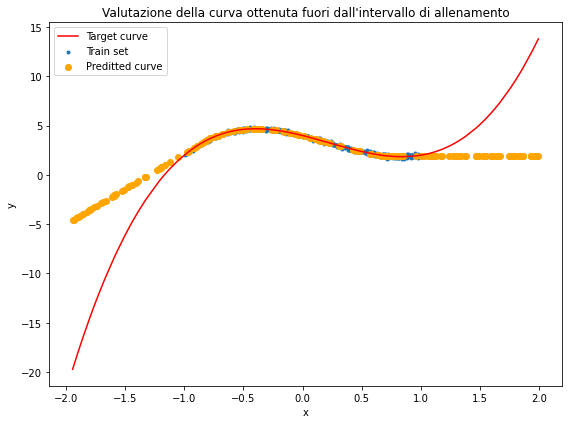

In [37]:

fig, axe = plt.subplots(1)
axes = axes.flatten()
fig.set_size_inches(8,6)

cdir = "../11/es2test17_outfiles"

#getting parameters
with open(f"{cdir}/para.js") as para_f:
    para = json.load(para_f)

#getting training sets
with open(f"{cdir}/data.js") as data_f:
    data = json.load(data_f)

#getting predictedd values
with open(f"{cdir}/predicted.js") as pred_f:
    pred = json.load(pred_f)
            
axe.set_title("Valutazione della curva ottenuta fuori dall'intervallo di allenamento")

axe.scatter(data['x_train'], data['y_train'], marker='.')
axe.scatter(pred['x_predicted'], pred['y_predicted'], color='orange')
x_target = target_function_es2(np.sort((pred['x_predicted'])))
axe.plot(np.sort(pred['x_predicted']),x_target, color='red')
axe.set_ylabel('y')
axe.set_xlabel('x')
axe.legend([ 'Target curve', 'Train set','Preditted curve'], loc='best')

plt.tight_layout()
plt.show()

Come si può chiaramente osservare, la curva ottenuta dal modello fallisce, in maniera evidente, nel predire la curva target fuori dall'intervallo in cui è stato allenato. Questo è uno dei limiti dello strumento delle reti neurali.

## 6 Esercizio 3

L'obettivo di questo terzo esercizio è l'implementazione di un modello di rete neurale analogo ai precedenti ma realizzato per la regressione di una superficie in 3 dimensioni.

La curva target è la seguente:
$$
f(x,y) = \sin(x^2+y^2)
$$

In seguito è riportato il codice che ho utilizzato per generare i dati e per definire ed eseguire il modello. Con questo codice ho sperimentato come in precedenza diverse configurazioni degli iperparametri. I grafici riportati sono relativi alla configurazione con cui ho ottenuto i risultati migliori.

Definisco innanzitutto i valori degli iperparametri.

In [26]:
#iperparametri
n_hidden_layers = 2
n_neurons_per_layer = 64
activation_function = 'relu'
opt = 'adam'
loss_function = 'mse'

sigma = 0.1
n_epochs = 300
n_train_data = 5000
n_valid_data = 5000


Genero i vari insiemi di dati che saranno utilizzati per allenamento e validazione.

In [40]:
#genero i dati
def target_function(x, y):
    return np.sin(x**2+y**2)

x_train = [0,0]
x_valid = [0,0]
# generate training inputs
np.random.seed(0)
x_train[0] = np.random.uniform(-3/2, 3/2, n_train_data)
x_valid[0] = np.random.uniform(-3/2, 3/2, n_valid_data)
x_train[1] = np.random.uniform(-3/2, 3/2, n_train_data)
x_valid[1] = np.random.uniform(-3/2, 3/2, n_valid_data)
x_train = np.transpose(x_train)
x_valid = np.transpose(x_valid)

y_target = target_function(x_valid[:,0], x_valid[:,1]) # ideal (target) linear function
y_train = np.random.normal(target_function(x_train[:,0], x_train[:,1]), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(target_function(x_valid[:,0], x_valid[:,1]), sigma)

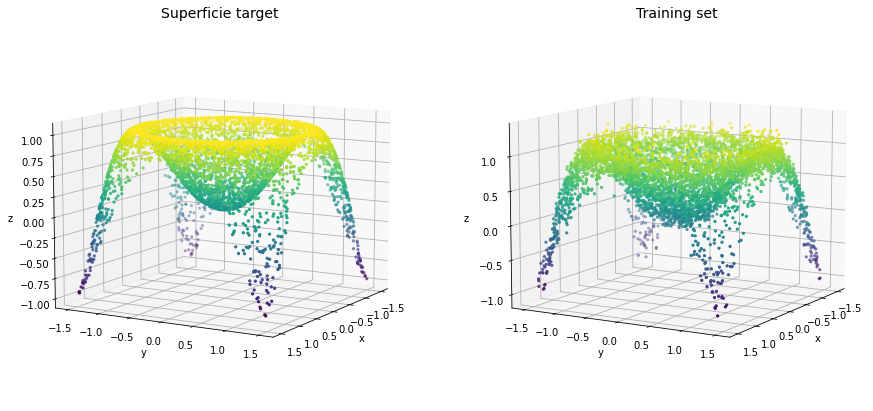

In [41]:
fig = plt.figure(figsize=[15,15])

ax1 = fig.add_subplot(1, 2, 1, projection='3d', label='1s')
ax1.scatter( x_valid[:,0], x_valid[:,1],y_target, c=y_target, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Superficie target', size=14)
ax1.grid(True)
ax1.view_init(10, 30)

ax2 = fig.add_subplot(1, 2, 2, projection='3d', label='1s')
ax2.scatter( x_train[:,0], x_train[:,1],y_train, c=y_train, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Training set', size=14)
ax2.grid(True)
ax2.view_init(10, 30)
plt.show()

In questi grafici si può visualizzare la curva target e i punti generati, con rumore, per l'allenamento del modello.

A questo punto devo definire la struttura della rete neurale che sarà utilizzata. La differenza sostanziale con l'implementazione precedente è che ora il layer di input disporrà di due neuroni ciascuno con due ingressi corrispondenti alla coppia (x,y).

In [42]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()

#layer di input 
model.add(Dense(2, input_shape=(2,), activation=activation_function))

#hidden layers
for i in range(0, n_hidden_layers):
        model.add(Dense(n_neurons_per_layer, activation_function))
        
#layer di output
model.add(Dense(1))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


Devo quindi compilare il modello specificando funzione di costo e ottimizzatore

In [44]:
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer=opt, loss=loss_function, metrics=['mse'])

Infine posso far partire l'esecuzione

In [45]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=n_epochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/300
157/157 [==============================] - 1s 2ms/step - loss: 0.2118 - mse: 0.2118 - val_loss: 0.1776 - val_mse: 0.1776
Epoch 2/300
157/157 [==============================] - 0s 2ms/step - loss: 0.1569 - mse: 0.1569 - val_loss: 0.1618 - val_mse: 0.1618
Epoch 3/300
157/157 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499 - val_loss: 0.1491 - val_mse: 0.1491
Epoch 4/300
157/157 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394 - val_loss: 0.1354 - val_mse: 0.1354
Epoch 5/300
157/157 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1285 - val_mse: 0.1285
Epoch 6/300
157/157 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174 - val_loss: 0.1142 - val_mse: 0.1142
Epoch 7/300
157/157 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095 - val_loss: 0.1066 - val_mse: 0.1066
Epoch 8/300
157/157 [==============================] - 0s 2ms/step - 

157/157 [==============================] - 0s 2ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 63/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0601 - mse: 0.0601 - val_loss: 0.0638 - val_mse: 0.0638
Epoch 64/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0661 - val_mse: 0.0661
Epoch 65/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0643 - val_mse: 0.0643
Epoch 66/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0602 - mse: 0.0602 - val_loss: 0.0633 - val_mse: 0.0633
Epoch 67/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0641 - val_mse: 0.0641
Epoch 68/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0603 - mse: 0.0603 - val_loss: 0.0666 - val_mse: 0.0666
Epoch 69/300
157/157 [==============================] - 0s 2ms/step - loss:

157/157 [==============================] - 0s 2ms/step - loss: 0.0594 - mse: 0.0594 - val_loss: 0.0629 - val_mse: 0.0629
Epoch 124/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0590 - mse: 0.0590 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 125/300
157/157 [==============================] - 0s 3ms/step - loss: 0.0595 - mse: 0.0595 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 126/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0591 - mse: 0.0591 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 127/300
157/157 [==============================] - 0s 3ms/step - loss: 0.0584 - mse: 0.0584 - val_loss: 0.0594 - val_mse: 0.0594
Epoch 128/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0580 - mse: 0.0580 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 129/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.0581 - val_mse: 0.0581
Epoch 130/300
157/157 [==============================] - 0s 3ms/step 

Epoch 184/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 185/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 186/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 187/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 188/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0126 - val_mse: 0.0126
Epoch 189/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 190/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 191/300
157/157 [==============================] 

157/157 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 245/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 246/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 247/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 248/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 249/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 250/300
157/157 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 251/300
157/157 [==============================] - 0s 2ms/step 

Valuto quindi il modello che ho allenato calcolando lo scarto quadratico medio dei valori predetti sia con quelli del validation set sia con i valori target.

In [46]:
# evaluate model
score_val_data = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
score_target_data = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
val_loss, val_accuracy = score_val_data
target_loss, target_accuracy = score_target_data

157/157 [==============================] - 0s 896us/step - loss: 0.0020 - mse: 0.0020


I valori della loss function sono piuttosto soddisfacenti in entrambi i casi.

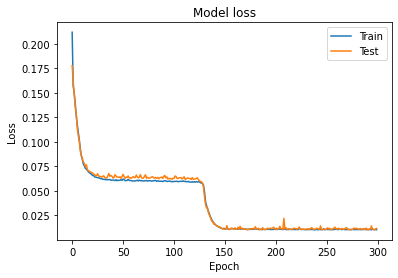

In [47]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

L'andamento della funzione di costo in funzione dell'epoca mostra che il modello si può ritenere allenato già dopo circa 200 epoche. Tuttavia l'evoluzione anche in epoche successive non sembra mostrare un sostanziale aumento nel valore della loss function valutata sul test set rispetto ai valori ottenuti dalla valutazione sul training set. Non sembra quindi esserci overlearning.

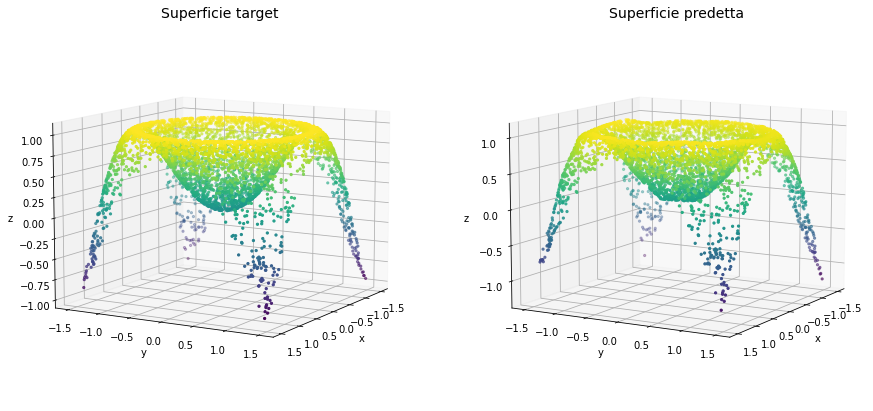

In [48]:
x_predicted=[0,0]
x_predicted[0] = np.random.uniform(-3/2, 3/2, 5000)
x_predicted[1] = np.random.uniform(-3/2, 3/2, 5000)

x_predicted = np.transpose(x_predicted)

y_predicted = model.predict(x_predicted)
y_target = target_function(x_predicted[:,0], x_predicted[:,1])

fig = plt.figure(figsize=[15,15])

ax1 = fig.add_subplot(1, 2, 1, projection='3d', label='1s')
ax1.scatter( x_predicted[:,0], x_predicted[:,1],y_target, c=y_target, marker='.')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Superficie target', size=14)
ax1.grid(True)
ax1.view_init(10, 30)

ax2 = fig.add_subplot(1, 2, 2, projection='3d', label='1s')
ax2.scatter( x_predicted[:,0], x_predicted[:,1],y_predicted, c=y_predicted, marker='.')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Superficie predetta', size=14)
ax2.grid(True)
ax2.view_init(10, 30)
plt.show()

In quest'ultimo grafico è infine mostrata una immagine in cui è possibile apprezzare come il modello di rete neurale abbia imparato con successo la forma della superficie che ha generato i dati.